In [78]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway


In [38]:
zoster=pd.read_csv('zoster.csv')
zoster.columns=['PatientID','age','cen','date_string']
zoster['date']=pd.to_datetime(zoster.date_string)


clinics=pd.read_csv('clinics.csv')
clinics.columns=['PatientID','age','event','type','date_string']
clinics['date']=pd.to_datetime(clinics.date_string)


atopic=pd.read_csv('atopic.csv')
atopic.columns=['PatientID','type','date_string']
atopic['date']=pd.to_datetime(atopic.date_string)

LP=pd.read_csv('LP.csv')
LP=LP[['Patient ID','Reference Event-Date of Documentation','Reference Event-Diagnosis Type']]
LP.columns=['PatientID','date_string','type']
LP['date']=pd.to_datetime(LP.date_string)

alopecia=pd.read_csv('alopecia.csv')
alopecia.columns=['PatientID','date_string','type']
alopecia['date']=pd.to_datetime(alopecia.date_string)

cellulitis=pd.read_csv('cellulitis.csv')
cellulitis.columns=['PatientID','date_string','type']
cellulitis['date']=pd.to_datetime(cellulitis.date_string)

BP=pd.read_csv('BP.csv')
BP.columns=['PatientID','date_string','type']
BP['date']=pd.to_datetime(BP.date_string)

onycho=pd.read_csv('onycho.csv')
onycho.columns=['PatientID','date_string','type']
onycho['date']=pd.to_datetime(onycho.date_string)



In [39]:
cut=-1
def rem_cut(df, cut):
    return df[:cut]

In [57]:
zoster_counts=zoster[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
zoster_counts = zoster_counts[:-1]
# zoster_counts=rem_cut(zoster_counts,cut)

clinics_counts=clinics[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
clinics_counts = clinics_counts[:-1]
# clinics_counts=rem_cut(clinics_counts,cut)



atopic_counts=atopic[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
# atopic_counts = atopic_counts[:-1]
# atopic_counts=rem_cut(atopic_counts,cut)


LP_counts=LP[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
LP_counts=LP_counts.append(atopic_counts.iloc[-1])
LP_counts.loc[LP_counts.index=='2021-05-09']=0
LP_counts=rem_cut(LP_counts,-2)


alopecia_counts=alopecia[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
# alopecia_counts = alopecia_counts[:-1]
# alopecia_counts=rem_cut(alopecia_counts,cut)


cellulitis_counts=cellulitis[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
cellulitis_counts = cellulitis_counts[:-1]
# cellulitis_counts=rem_cut(cellulitis_counts,cut)


BP_counts=BP[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
BP_counts=BP_counts.append(atopic_counts.iloc[-2])

BP_counts=BP_counts.append(atopic_counts.iloc[-1])
BP_counts[-2:]=0

# BP_counts.loc[BP_counts.index=='2021-05-09']=0
# BP_counts=rem_cut(BP_counts,cut)

# 
onycho_counts=onycho[['PatientID','date']].groupby(pd.Grouper(key='date', freq='1W')).count()
# onycho_counts = onycho_counts[:-1]
# onycho_counts=rem_cut(onycho_counts,cut)


In [58]:
BP_counts

,PatientID
date,
2007-04-29,1
2007-05-06,0
2007-05-13,0
2007-05-20,0
2007-05-27,0
...,...
2021-07-18,0
2021-07-25,2
2021-08-01,5


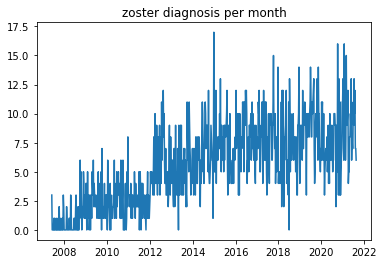

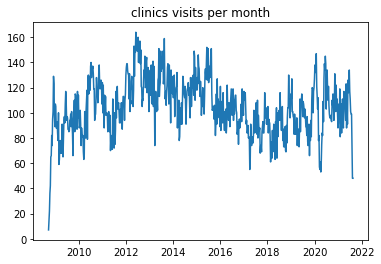

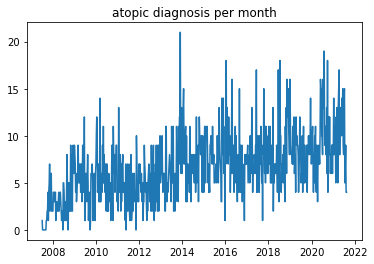

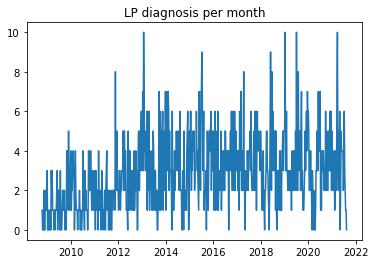

In [59]:
plt.plot(zoster_counts.index,zoster_counts.PatientID)
plt.title('zoster diagnosis per month')
plt.show()

plt.plot(clinics_counts.index,clinics_counts.PatientID)
plt.title('clinics visits per month')
plt.show()

plt.plot(atopic_counts.index,atopic_counts.PatientID)
plt.title('atopic diagnosis per month')
plt.show()

plt.plot(LP_counts.index,LP_counts.PatientID)
plt.title('LP diagnosis per month')
plt.show()



In [60]:
zoster_last_year=zoster_counts[-52:]
zoster_before_year=zoster_counts[-104:-52]
zoster_before_year.index=zoster_last_year.index

atopic_last_year=atopic_counts[-52:]
atopic_before_year=atopic_counts[-104:-52]
atopic_before_year.index=atopic_last_year.index


clinics_last_year=clinics_counts[-52:]
clinics_before_year=clinics_counts[-104:-52]
clinics_before_year.index=clinics_last_year.index

LP_last_year=LP_counts[-52:]
LP_before_year=LP_counts[-104:-52]
LP_before_year.index=LP_last_year.index

alopecia_last_year=alopecia_counts[-52:]
alopecia_before_year=alopecia_counts[-104:-52]
alopecia_before_year.index=alopecia_last_year.index

cellulitis_last_year=cellulitis_counts[-52:]
cellulitis_before_year=cellulitis_counts[-104:-52]
cellulitis_before_year.index=cellulitis_last_year.index

BP_last_year=BP_counts[-52:]
BP_before_year=BP_counts[-104:-52]
BP_before_year.index=BP_last_year.index

onycho_last_year=onycho_counts[-52:]
onycho_before_year=onycho_counts[-104:-52]
onycho_before_year.index=onycho_last_year.index

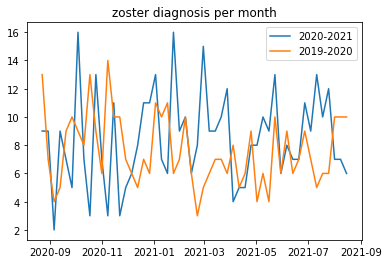

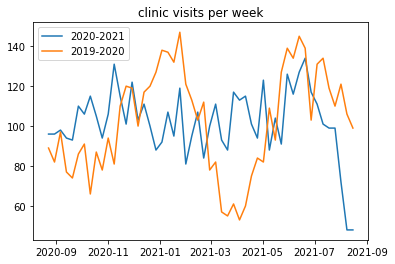

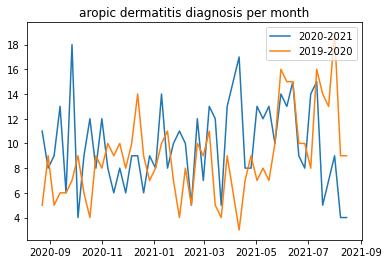

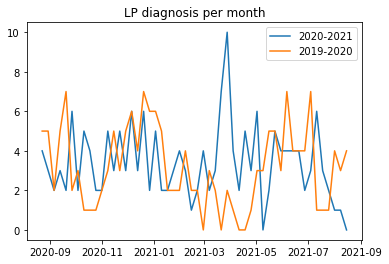

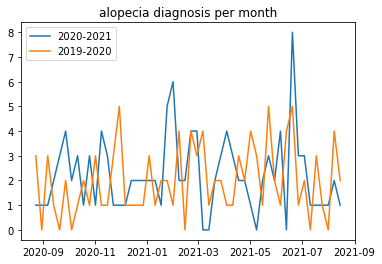

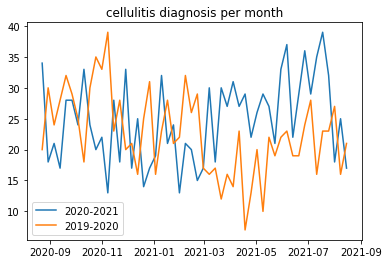

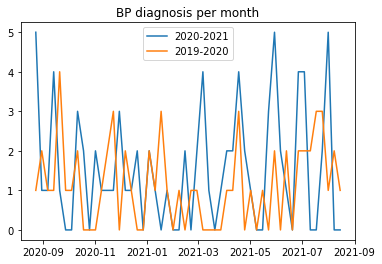

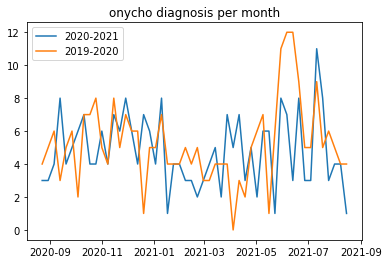

In [61]:
plt.plot(zoster_last_year.index,zoster_last_year.PatientID)
plt.plot(zoster_before_year.index,zoster_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('zoster diagnosis per month')
plt.show()

plt.plot(clinics_last_year.index,clinics_last_year.PatientID)
plt.plot(clinics_before_year.index,clinics_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('clinic visits per week')
plt.show()

plt.plot(atopic_last_year.index,atopic_last_year.PatientID)
plt.plot(atopic_before_year.index,atopic_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('aropic dermatitis diagnosis per month')
plt.show()

plt.plot(LP_last_year.index,LP_last_year.PatientID)
plt.plot(LP_before_year.index,LP_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('LP diagnosis per month')
plt.show()

plt.plot(alopecia_last_year.index,alopecia_last_year.PatientID)
plt.plot(alopecia_before_year.index,alopecia_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('alopecia diagnosis per month')
plt.show()

plt.plot(cellulitis_last_year.index,cellulitis_last_year.PatientID)
plt.plot(cellulitis_before_year.index,cellulitis_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('cellulitis diagnosis per month')
plt.show()

plt.plot(BP_last_year.index,BP_last_year.PatientID)
plt.plot(BP_before_year.index,BP_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('BP diagnosis per month')
plt.show()

plt.plot(onycho_last_year.index,onycho_last_year.PatientID)
plt.plot(onycho_before_year.index,onycho_before_year.PatientID)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('onycho diagnosis per month')
plt.show()

In [62]:
zoster_prop_by_clinics=True

In [63]:
count_table=zoster_counts.merge(clinics_counts, on='date',how='inner')
count_table=count_table.merge(atopic_counts, on='date',how='inner')
count_table=count_table.merge(LP_counts, on='date',how='inner')
count_table=count_table.merge(alopecia_counts, on='date',how='inner')
count_table=count_table.merge(cellulitis_counts, on='date',how='inner')
count_table=count_table.merge(BP_counts, on='date',how='inner')
count_table=count_table.merge(onycho_counts, on='date',how='inner')



count_table.columns=['zoster','clinics','atopic','LP','alopecia','cellulitis','BP','onycho']

if zoster_prop_by_clinics:
    count_table['zoster_proportion']=count_table.zoster/count_table.clinics*100
else:
    count_table['zoster_proportion']=count_table.zoster/count_table.cellulitis*100


count_table['atopic_proportion']=count_table.atopic/count_table.clinics*100
count_table['LP_proportion']=count_table.LP/count_table.clinics*100
count_table['alopecia_proportion']=count_table.alopecia/count_table.clinics*100
count_table['cellulitis_proportion']=count_table.cellulitis/count_table.clinics*100
count_table['BP_proportion']=count_table.BP/count_table.clinics*100
count_table['onycho_proportion']=count_table.onycho/count_table.clinics*100

## CONTINUE

In [21]:
years=pd.DataFrame()
mean_years=count_table[-207:-51]
for i in range(52):
    temp=mean_years.iloc[[i, i+52, i+104], :]
    mean_df=temp.mean().to_frame(name=temp.index[-1]).T
    years=years.append(mean_df)

## ANATYSIS

In [64]:
count_table

,zoster,clinics,atopic,LP,alopecia,cellulitis,BP,onycho,zoster_proportion,atopic_proportion,LP_proportion,alopecia_proportion,cellulitis_proportion,BP_proportion,onycho_proportion
date,,,,,,,,,,,,,,,
2009-03-22,3,78,5,3,0,14,0,1,3.846154,6.410256,3.846154,0.000000,17.948718,0.000000,1.282051
2009-03-29,0,68,5,1,0,13,0,0,0.000000,7.352941,1.470588,0.000000,19.117647,0.000000,0.000000
2009-04-05,2,74,7,1,0,9,2,0,2.702703,9.459459,1.351351,0.000000,12.162162,2.702703,0.000000
2009-04-12,3,68,7,1,0,20,0,2,4.411765,10.294118,1.470588,0.000000,29.411765,0.000000,2.941176
2009-04-19,1,91,4,0,0,11,0,0,1.098901,4.395604,0.000000,0.000000,12.087912,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-18,10,99,5,3,1,39,0,8,10.101010,5.050505,3.030303,1.010101,39.393939,0.000000,8.080808
2021-07-25,12,99,7,2,1,32,2,3,12.121212,7.070707,2.020202,1.010101,32.323232,2.020202,3.030303
2021-08-01,7,72,9,1,1,18,5,4,9.722222,12.500000,1.388889,1.388889,25.000000,6.944444,5.555556


In [65]:
vaccination=count_table[-52:]

In [67]:
pandemic=count_table[-104:-52]

In [70]:
years=pd.DataFrame()
mean_years=count_table[-(52*5):-(52*2)]
for i in range(52):
    temp=mean_years.iloc[[i, i+52, i+104], :]
    mean_df=temp.mean().to_frame(name=temp.index[-1]).T
    years=years.append(mean_df)

In [87]:
weeks=-37

cats=['zoster_proportion', 'atopic_proportion', 'LP_proportion',
       'alopecia_proportion', 'cellulitis_proportion', 'BP_proportion',
       'onycho_proportion']

In [111]:
type(vacc_mean)

float

In [148]:
output = pd.DataFrame()


for condition in cats:
    vacc=vaccination[condition][weeks:]
    pan=pandemic[condition][weeks:]
    control=years[condition][weeks:]
    anovap=f_oneway(vacc, pan, control)[1].round(3)
    vacc_mean=round(vacc.mean(),2)
    vacc_std=round(vacc.std(),2)
    pan_mean=round(pan.mean(),2)
    pan_std=round(pan.std(),2)
    control_mean=round(control.mean(),2)
    control_std=round(control.std(),2)
    vac_con_p=stats.ttest_ind(vacc,control)[1].round(3)
    vac_pan_p=stats.ttest_ind(vacc,pan)[1].round(3)
    pan_con_p=stats.ttest_ind(pan,control)[1].round(3)
    con_name=condition.split('_')[0]
    results={'condition':con_name,'anova':anovap, 'vaccines':f'{vacc_mean}({vacc_std})','pandemic':f'{pan_mean}({pan_std})','control':f'{control_mean}({control_std})','vac_con_p':vac_con_p,'vac_pan_p':vac_pan_p,'pan_con_p':pan_con_p}
    output = output.append(results, ignore_index=True)
    


In [149]:
order_columns=[ 'condition', 'control', 'vaccines', 'pandemic','anova', 'vac_con_p','pan_con_p', 'vac_pan_p']
output[order_columns]

,condition,control,vaccines,pandemic,anova,vac_con_p,pan_con_p,vac_pan_p
0,zoster,8.81(2.09),9.25(3.24),7.06(2.77),0.002,0.493,0.003,0.003
1,atopic,8.73(1.64),10.05(2.89),9.02(2.87),0.068,0.019,0.606,0.128
2,LP,3.73(1.21),3.32(1.96),2.81(1.72),0.062,0.289,0.010,0.232
3,alopecia,1.31(0.7),2.28(1.62),2.09(1.39),0.004,0.001,0.003,0.586
4,cellulitis,26.32(5.16),25.39(7.68),19.93(6.15),0.000,0.543,0.000,0.001
5,BP,1.39(0.79),1.44(1.59),1.02(0.98),0.242,0.844,0.079,0.170
6,onycho,4.55(1.34),4.62(2.27),4.77(2.03),0.875,0.857,0.571,0.767


In [140]:
output.shape

(7, 8)

#### FOR RESULTS

In [22]:
vacc_weeks=-36
res_count=count_table[vacc_weeks:]

In [23]:
cats=['zoster_proportion', 'atopic_proportion', 'LP_proportion',
       'alopecia_proportion', 'cellulitis_proportion', 'BP_proportion',
       'onycho_proportion']

In [24]:
control1=count_table[-(51-vacc_weeks):-51]
control2=count_table[-(103-vacc_weeks):-103]
control2.index=control1.index

control3=count_table[-(155-vacc_weeks):-155]
control3.index=control1.index

control=pd.concat([control1, control2,control3])
control=(control1+control2+control3)/3

In [16]:
pvals={}
for cat in cats:
    a=res_count[cat]
    b=control1[cat]
    pval=stats.ttest_ind(a,b)[1]
    pvals[cat]=pval.round(3)

In [17]:
pvals=pd.DataFrame.from_dict(pvals,orient='index')
pvals.columns=['pval']

In [18]:
vactime=pd.DataFrame(res_count.sum()).round(1)
vactime.columns=['vac']
vactime

,vac
zoster,324.0
clinics,3670.0
atopic,370.0
LP,125.0
alopecia,82.0
cellulitis,899.0
BP,59.0
onycho,167.0
zoster_proportion,327.5
atopic_proportion,363.4


In [19]:
fyears=years[vacc_weeks:]
contime=pd.DataFrame(control.sum()).round(1)
contime.columns=['control']
f=vactime.merge(contime, on=contime.index)
f.set_index('key_0',inplace=True)
f=f[8:]
fg=f.merge(pvals, on=f.index)


In [20]:
fg

,key_0,vac,control,pval
0,zoster_proportion,327.5,297.7,0.006
1,atopic_proportion,363.4,318.3,0.111
2,LP_proportion,120.9,121.4,0.141
3,alopecia_proportion,80.4,56.4,0.759
4,cellulitis_proportion,887.3,879.0,0.002
5,BP_proportion,61.7,44.0,0.049
6,onycho_proportion,162.7,172.7,0.666


In [277]:
fg.to_csv('f.csv')

CONTINUE

## IF 4

In [46]:
zoster_prop_last_year=count_table.zoster_proportion[-52:]
zoster_prop_before_year=years.zoster_proportion
zoster_prop_before_year.index=zoster_prop_last_year.index


atopic_prop_last_year=count_table.atopic_proportion[-52:]
atopic_prop_before_year=years.atopic_proportion
atopic_prop_before_year.index=atopic_prop_last_year.index


LP_prop_last_year=count_table.LP_proportion[-52:]
LP_prop_before_year=years.LP_proportion
LP_prop_before_year.index=LP_prop_last_year.index

## IF ALL

In [21]:
zoster_prop_last_year=count_table.zoster_proportion[-52:]
zoster_prop_before_year=years.zoster_proportion
zoster_prop_before_year.index=zoster_prop_last_year.index


atopic_prop_last_year=count_table.atopic_proportion[-52:]
atopic_prop_before_year=years.atopic_proportion
atopic_prop_before_year.index=atopic_prop_last_year.index


LP_prop_last_year=count_table.LP_proportion[-52:]
LP_prop_before_year=years.LP_proportion
LP_prop_before_year.index=LP_prop_last_year.index

alopecia_prop_last_year=count_table.alopecia_proportion[-52:]
alopecia_prop_before_year=years.alopecia_proportion
alopecia_prop_before_year.index=alopecia_prop_last_year.index


cellulitis_prop_last_year=count_table.cellulitis_proportion[-52:]
cellulitis_prop_before_year=years.cellulitis_proportion
cellulitis_prop_before_year.index=cellulitis_prop_last_year.index


BP_prop_last_year=count_table.BP_proportion[-52:]
BP_prop_before_year=years.BP_proportion
BP_prop_before_year.index=BP_prop_last_year.index

onycho_prop_last_year=count_table.onycho_proportion[-52:]
onycho_prop_before_year=years.onycho_proportion
onycho_prop_before_year.index=onycho_prop_last_year.index

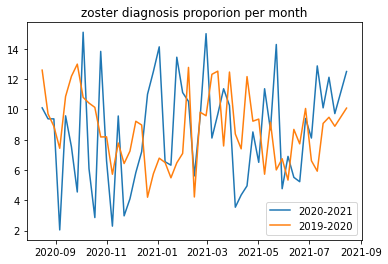

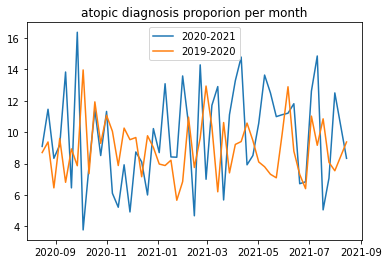

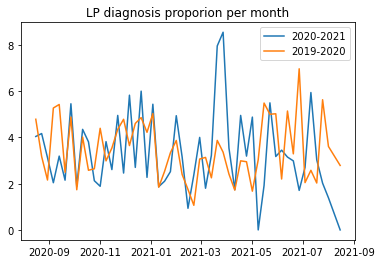

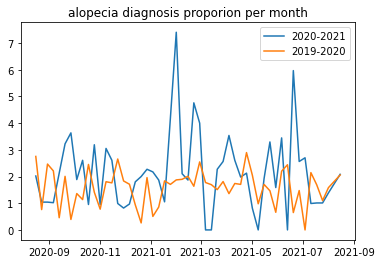

In [22]:
plt.plot(zoster_prop_last_year.index,zoster_prop_last_year)
plt.plot(zoster_prop_before_year.index,zoster_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('zoster diagnosis proporion per month')
plt.show()

plt.plot(atopic_prop_last_year.index,atopic_prop_last_year)
plt.plot(atopic_prop_before_year.index,atopic_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('atopic diagnosis proporion per month')
plt.show()

plt.plot(LP_prop_last_year.index,LP_prop_last_year)
plt.plot(LP_prop_before_year.index,LP_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('LP diagnosis proporion per month')
plt.show()

plt.plot(alopecia_prop_last_year.index,alopecia_prop_last_year)
plt.plot(alopecia_prop_before_year.index,alopecia_prop_before_year)
plt.legend(labels=['2020-2021','2019-2020'])
plt.title('alopecia diagnosis proporion per month')
plt.show()

In [23]:
vacc_divider=20000

vacc=pd.read_csv('vaccines.csv')
vacc.replace('<15', 0, inplace=True)
vacc['first_dose']=pd.to_numeric(vacc['first_dose'])
vacc['second_dose']=pd.to_numeric(vacc['second_dose'])
vacc['third_dose']=pd.to_numeric(vacc['third_dose'])


vacc=vacc.groupby(['VaccinationDate']).sum()
vacc['date']=pd.to_datetime(vacc.index)
vacc_counts=vacc[['first_dose','second_dose','third_dose','date']].groupby(pd.Grouper(key='date', freq='1W')).sum()
# vacc_counts=vacc_counts[:-1]
vacc_counts=vacc_counts/vacc_divider

shift=0
vacc_counts=vacc_counts.shift(periods=shift)
vacc_counts.fillna(0, inplace=True)

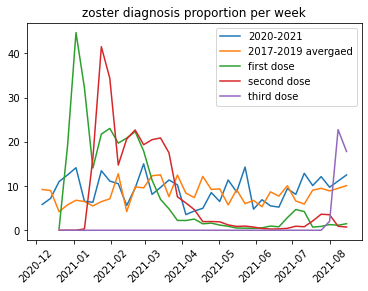

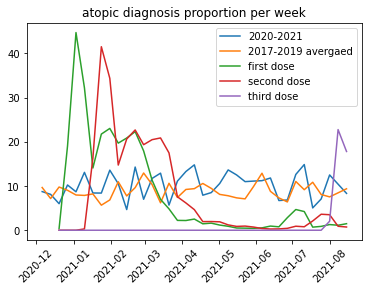

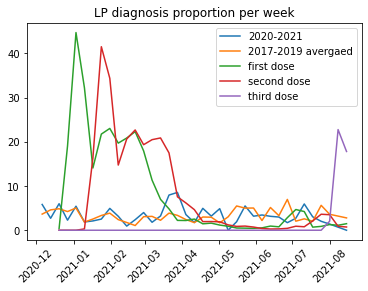

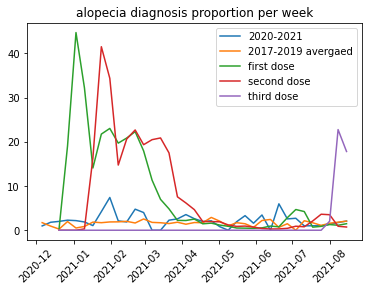

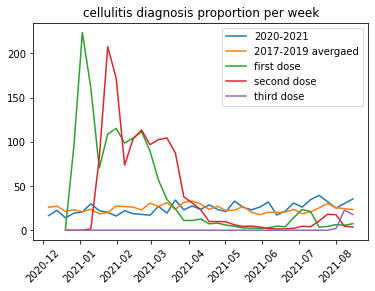

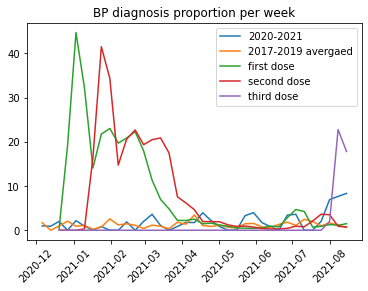

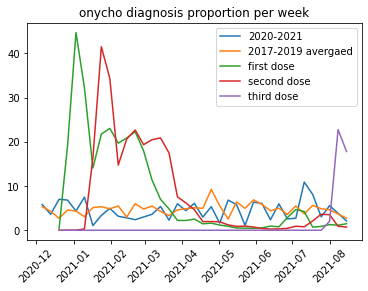

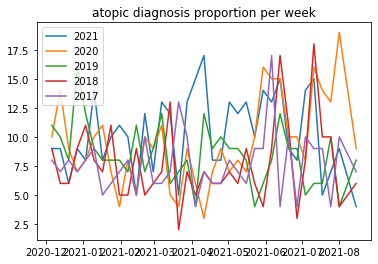

In [29]:
last_weeks=vacc_weeks

plt.plot(zoster_prop_last_year.index[(last_weeks):],zoster_prop_last_year[(last_weeks):])
plt.plot(zoster_prop_before_year.index[(last_weeks):],zoster_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('zoster diagnosis proportion per week')
plt.savefig('figures/zoster.png')
plt.show()

plt.plot(atopic_prop_last_year.index[(last_weeks):],atopic_prop_last_year[(last_weeks):])
plt.plot(atopic_prop_before_year.index[(last_weeks):],atopic_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('atopic diagnosis proportion per week')
plt.savefig('figures/atopic.png')
plt.show()


plt.plot(LP_prop_last_year.index[(last_weeks):],LP_prop_last_year[(last_weeks):])
plt.plot(LP_prop_before_year.index[(last_weeks):],LP_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('LP diagnosis proportion per week')
plt.savefig('figures/LP.png')

plt.show()

plt.plot(alopecia_prop_last_year.index[(last_weeks):],alopecia_prop_last_year[(last_weeks):])
plt.plot(alopecia_prop_before_year.index[(last_weeks):],alopecia_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('alopecia diagnosis proportion per week')
plt.savefig('figures/alopecia.png')

plt.show()

plt.plot(cellulitis_prop_last_year.index[(last_weeks):],cellulitis_prop_last_year[(last_weeks):])
plt.plot(cellulitis_prop_before_year.index[(last_weeks):],cellulitis_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):]*5)
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):]*5)
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('cellulitis diagnosis proportion per week')
plt.savefig('figures/cellulitis.png')

plt.show()

plt.plot(BP_prop_last_year.index[(last_weeks):],BP_prop_last_year[(last_weeks):])
plt.plot(BP_prop_before_year.index[(last_weeks):],BP_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('BP diagnosis proportion per week')
plt.savefig('figures/BP.png')

plt.show()

plt.plot(onycho_prop_last_year.index[(last_weeks):],onycho_prop_last_year[(last_weeks):])
plt.plot(onycho_prop_before_year.index[(last_weeks):],onycho_prop_before_year[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
plt.plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
plt.xticks(rotation=45)
plt.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'])
plt.title('onycho diagnosis proportion per week')
plt.savefig('figures/onycho.png')

plt.show()

var='atopic'

x=onycho_prop_last_year.index[vacc_weeks:]
plt.plot(x,y2021[var])
plt.plot(x,y2020[var])
plt.plot(x,y2019[var])
plt.plot(x,y2018[var])
plt.plot(x,y2017[var])
plt.legend(['2021','2020','2019','2018','2017'])
title=var.replace('_',' ')
plt.title(f'{title} diagnosis proportion per week')
plt.show()

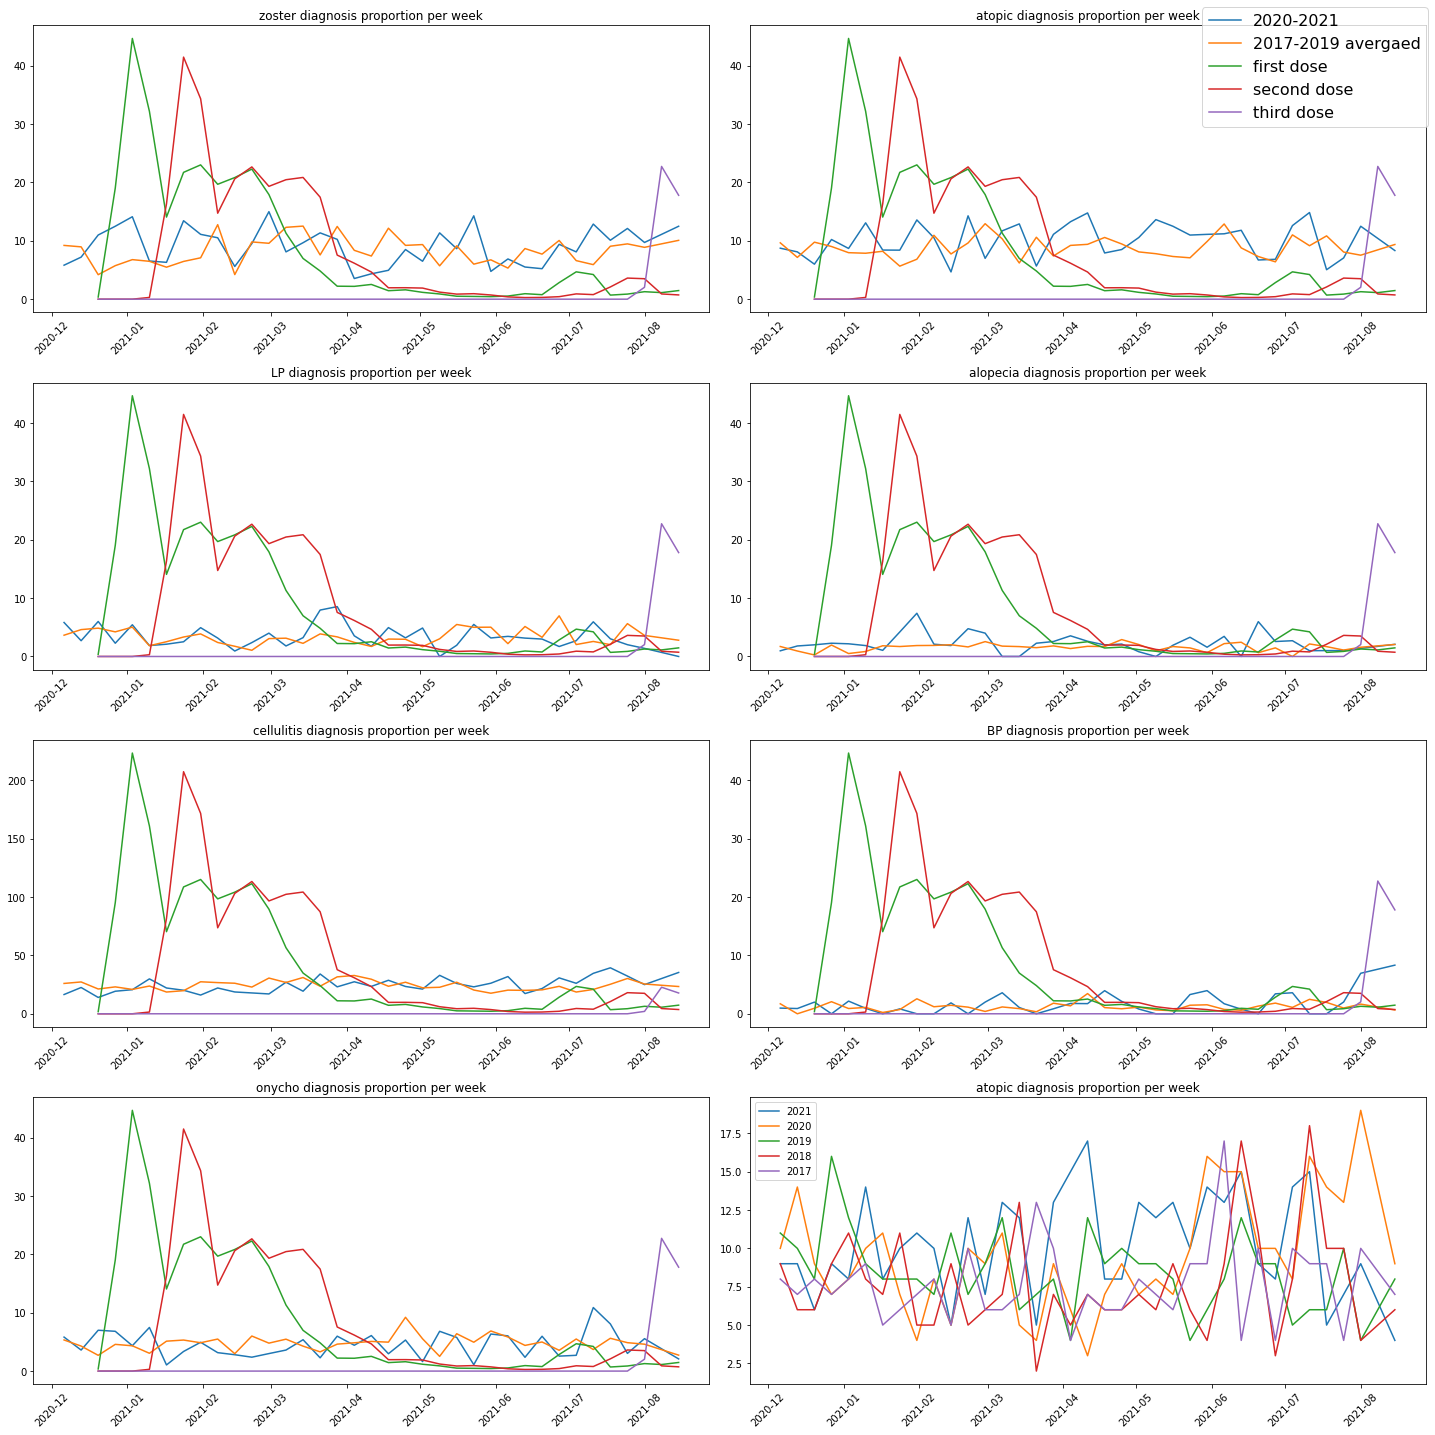

In [62]:
fig, axs = plt.subplots(4, 2,figsize=(20,20))

last_weeks=vacc_weeks



axs[0, 0].plot(zoster_prop_last_year.index[(last_weeks):],zoster_prop_last_year[(last_weeks):])
axs[0, 0].plot(zoster_prop_before_year.index[(last_weeks):],zoster_prop_before_year[(last_weeks):])
axs[0, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[0, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[0, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[0, 0].title.set_text('zoster diagnosis proportion per week')


axs[0, 1].plot(atopic_prop_last_year.index[(last_weeks):],atopic_prop_last_year[(last_weeks):])
axs[0, 1].plot(atopic_prop_before_year.index[(last_weeks):],atopic_prop_before_year[(last_weeks):])
axs[0, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[0, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[0, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[0, 1].title.set_text('atopic diagnosis proportion per week')


axs[1, 0].plot(LP_prop_last_year.index[(last_weeks):],LP_prop_last_year[(last_weeks):])
axs[1, 0].plot(LP_prop_before_year.index[(last_weeks):],LP_prop_before_year[(last_weeks):])
axs[1, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[1, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[1, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[1, 0].title.set_text('LP diagnosis proportion per week')

axs[1, 1].plot(alopecia_prop_last_year.index[(last_weeks):],alopecia_prop_last_year[(last_weeks):])
axs[1, 1].plot(alopecia_prop_before_year.index[(last_weeks):],alopecia_prop_before_year[(last_weeks):])
axs[1, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[1, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[1, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[1, 1].title.set_text('alopecia diagnosis proportion per week')

axs[2, 0].plot(cellulitis_prop_last_year.index[(last_weeks):],cellulitis_prop_last_year[(last_weeks):])
axs[2, 0].plot(cellulitis_prop_before_year.index[(last_weeks):],cellulitis_prop_before_year[(last_weeks):])
axs[2, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):]*5)
axs[2, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):]*5)
axs[2, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[2, 0].title.set_text('cellulitis diagnosis proportion per week')


axs[2, 1].plot(BP_prop_last_year.index[(last_weeks):],BP_prop_last_year[(last_weeks):])
axs[2, 1].plot(BP_prop_before_year.index[(last_weeks):],BP_prop_before_year[(last_weeks):])
axs[2, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[2, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[2, 1].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[2, 1].title.set_text('BP diagnosis proportion per week')


axs[3, 0].plot(onycho_prop_last_year.index[(last_weeks):],onycho_prop_last_year[(last_weeks):])
axs[3, 0].plot(onycho_prop_before_year.index[(last_weeks):],onycho_prop_before_year[(last_weeks):])
axs[3, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.first_dose[(last_weeks):])
axs[3, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.second_dose[(last_weeks):])
axs[3, 0].plot(vacc_counts.index[(last_weeks):],vacc_counts.third_dose[(last_weeks):])
axs[3, 0].title.set_text('onycho diagnosis proportion per week')

var='atopic'
x=onycho_prop_last_year.index[vacc_weeks:]
axs[3, 1].plot(x,y2021[var])
axs[3, 1].plot(x,y2020[var])
axs[3, 1].plot(x,y2019[var])
axs[3, 1].plot(x,y2018[var])
axs[3, 1].plot(x,y2017[var])
axs[3, 1].legend(['2021','2020','2019','2018','2017'])
title=var.replace('_',' ')
axs[3, 1].title.set_text(f'{title} diagnosis proportion per week')



fig.legend(labels=['2020-2021','2017-2019 avergaed','first dose', 'second dose','third dose'],loc = 'upper right', fontsize=16)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
fig.tight_layout()    
plt.savefig('figures/final.png')

## between years compairson

In [25]:
years

,zoster,clinics,atopic,LP,alopecia,cellulitis,BP,onycho,zoster_proportion,atopic_proportion,LP_proportion,alopecia_proportion,cellulitis_proportion,BP_proportion,onycho_proportion
2019-08-25,10.666667,84.333333,7.333333,4.000000,2.333333,27.000000,0.666667,4.666667,12.591037,8.700328,4.784605,2.753490,32.445914,0.762129,5.533110
2019-09-01,8.333333,85.666667,8.000000,2.666667,0.666667,26.333333,0.666667,4.000000,9.702895,9.375186,3.173238,0.761930,30.890698,0.813008,4.710159
2019-09-08,6.666667,79.333333,5.000000,1.666667,2.000000,25.666667,1.000000,3.666667,8.881957,6.452298,2.157873,2.467941,33.354863,1.256885,4.479261
2019-09-15,5.666667,76.333333,7.333333,4.000000,1.666667,27.666667,1.000000,1.666667,7.431307,9.596710,5.271455,2.211602,36.156786,1.310701,2.153402
2019-09-22,8.000000,73.666667,5.000000,4.000000,0.333333,29.333333,1.666667,4.666667,10.854005,6.806121,5.423917,0.456621,39.855609,2.258423,6.324818
2019-09-29,9.666667,81.333333,7.000000,2.000000,1.666667,30.666667,1.666667,5.333333,12.186233,8.933664,2.490441,2.007349,37.224135,1.994284,6.396580
2019-10-06,10.666667,82.000000,6.666667,4.000000,0.333333,30.666667,1.333333,2.666667,12.988580,7.862530,4.880414,0.392157,37.953027,1.794872,3.253609
2019-10-13,8.000000,74.666667,10.666667,1.333333,1.000000,22.333333,1.333333,3.666667,10.792833,13.962290,1.737206,1.362674,30.374088,1.759165,5.250601
2019-10-20,9.333333,90.000000,6.666667,3.666667,1.000000,25.333333,1.333333,5.000000,10.416924,7.350966,4.015161,1.136654,28.232604,1.469534,5.621060
2019-10-27,8.000000,79.333333,9.333333,2.000000,2.000000,24.666667,1.333333,5.333333,10.132704,11.928861,2.578562,2.453249,31.477733,1.629073,6.718720


In [25]:
num_weeks=-(vacc_weeks)
y2021=count_table[-num_weeks:]
y2020=count_table[-num_weeks-52:-52]
y2019=count_table[-num_weeks-104:-104]
y2018=count_table[-num_weeks-156:-156]
y2017=count_table[-num_weeks-208:-208]



In [26]:
props=['zoster_proportion', 'atopic_proportion', 'LP_proportion',
       'alopecia_proportion', 'cellulitis_proportion', 'BP_proportion',
       'onycho_proportion']

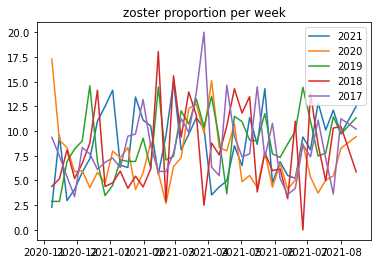

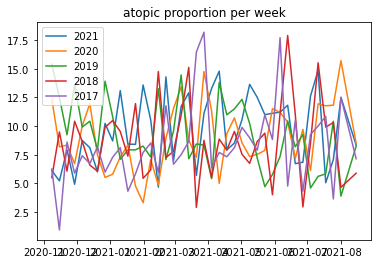

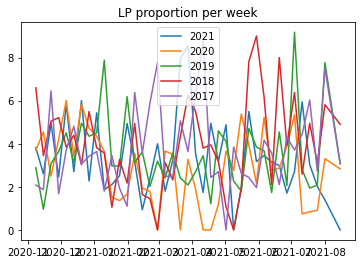

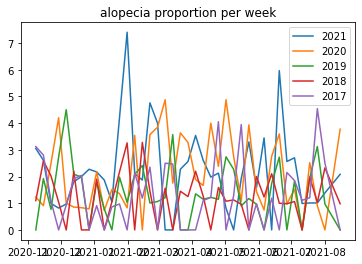

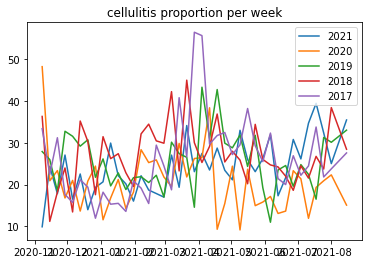

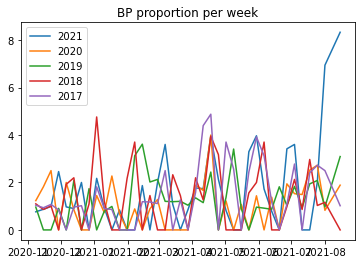

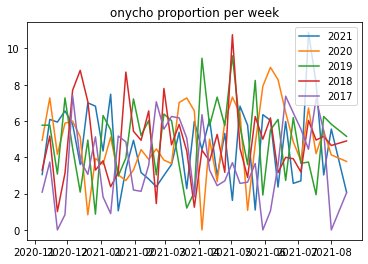

In [145]:
for var in props:
    x=onycho_prop_last_year.index[vacc_weeks:]
    plt.plot(x,y2021[var])
    plt.plot(x,y2020[var])
    plt.plot(x,y2019[var])
    plt.plot(x,y2018[var])
    plt.plot(x,y2017[var])
    plt.legend(['2021','2020','2019','2018','2017'])
    title=var.replace('_',' ')
    plt.title(f'{title} per week')
    plt.show()

In [278]:
from scipy.stats import f_oneway
for var in props:
    y21=y2021[var]
    y20=y2020[var]
    y19=y2019[var]
    y18=y2018[var]
    y17=y2017[var]
    pval=f_oneway(y21, y20, y19, y18, y17)[1]
    print (f'{var}: {pval}')

zoster_proportion: 0.2415253705535023
atopic_proportion: 0.37660550730520964
LP_proportion: 0.10134062058436176
alopecia_proportion: 0.0004178368267031592
cellulitis_proportion: 0.002202225685732929
BP_proportion: 0.32832763407345944
onycho_proportion: 0.06488387696985459


In [279]:
dic={'21':y2021,'20':y2020,'19':y2019,'18':y2018,'17':y2017}

In [280]:
for var in props:
    print (var)
     
    res=pd.DataFrame(index=dic.keys(), columns=dic.keys())
    for key1 in dic.keys():
        for key2 in dic.keys():
            pval=stats.ttest_ind(dic[key1][var], dic[key2][var])[1]
            res.loc[key1,key2]=pval
    res.to_csv(f'ttests/{var}.csv')
    print (res)

zoster_proportion
           21         20         19        18        17
21          1  0.0638932   0.720889  0.442775  0.826808
20  0.0638932          1  0.0215439  0.386206  0.104448
19   0.720889  0.0215439          1  0.267572  0.559467
18   0.442775   0.386206   0.267572         1  0.568798
17   0.826808   0.104448   0.559467  0.568798         1
atopic_proportion
           21        20        19        18         17
21          1  0.299458  0.425778  0.156833  0.0680142
20   0.299458         1  0.814827  0.633319     0.3518
19   0.425778  0.814827         1  0.493273   0.260096
18   0.156833  0.633319  0.493273         1   0.661698
17  0.0680142    0.3518  0.260096  0.661698          1
LP_proportion
          21         20         19         18         17
21         1   0.217812   0.659998   0.177334   0.407418
20  0.217812          1  0.0817804  0.0111184  0.0381941
19  0.659998  0.0817804          1   0.325544    0.67118
18  0.177334  0.0111184   0.325544          1   0.577581

T TEST

In [149]:
var_dict={
    'zoster':[zoster_prop_last_year,zoster_prop_before_year],
    'atopic':[atopic_prop_last_year,atopic_prop_before_year],
    'LP':[LP_prop_last_year,LP_prop_before_year],
    'alopecia':[alopecia_prop_last_year,alopecia_prop_before_year],
    'cellulitis':[cellulitis_prop_last_year,cellulitis_prop_before_year],
    'BP':[BP_prop_last_year,BP_prop_before_year],
    
}

In [150]:
for var in var_dict.keys():
    last=var_dict[var][0][(last_weeks):]
    before=var_dict[var][1][(last_weeks):]
    pval=stats.ttest_rel(last, before)[1]
    print (f'{var}: pval is {pval}')


zoster: pval is 0.19722007609837025
atopic: pval is 0.541835985016967
LP: pval is 0.2635989909278039
alopecia: pval is 0.03153747896213402
cellulitis: pval is 0.008683342416153702
BP: pval is 0.48804744504859154


DWT

In [151]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [152]:
import numpy as np
dtw(atopic_prop_last_year[(last_weeks):],vacc_counts.first_dose[(last_weeks):],3)

array([[  0.        ,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,  11.32075472,  22.64150943,  33.96226415,
         45.28301887,  56.60377358,  67.9245283 ,  79.24528302,
         90.56603774,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,  17.42762495,  17.42762495,  23.53449517,
         29.6413654 ,  35.74823563,  41.85510586,  47.96197609,
         54.06884632,  60.17571655,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,  22.64501625,  

In [156]:
res=[]
for i in range( 12):
    vacc=pd.read_csv('vaccines.csv')
    vacc.replace('<15', 0, inplace=True)
    vacc['first_dose']=pd.to_numeric(vacc['first_dose'])
    vacc['second_dose']=pd.to_numeric(vacc['second_dose'])

    vacc=vacc.groupby(['VaccinationDate']).sum()
    vacc['date']=pd.to_datetime(vacc.index)
    vacc_counts=vacc[['first_dose','second_dose','date']].groupby(pd.Grouper(key='date', freq='1W')).sum()
    vacc_counts=vacc_counts[:-1]
    vacc_counts=vacc_counts/20000

    shift=i
    vacc_counts=vacc_counts.shift(periods=shift)
    vacc_counts.fillna(0, inplace=True)

    d=dtw(atopic_prop_last_year[(last_weeks):],vacc_counts.first_dose[(last_weeks):],3)
    res.append(d[26,19])

In [157]:
d.shape

(27, 20)

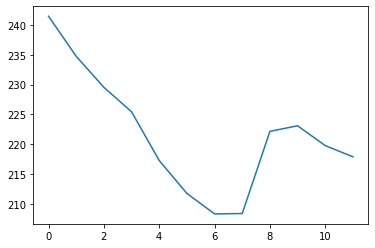

In [158]:
plt.plot(range(12),res)

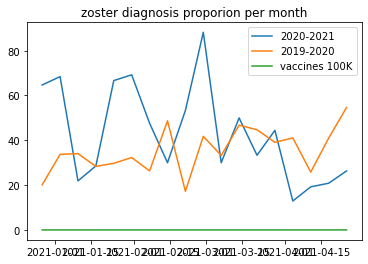

In [18]:

plt.plot(zoster_prop_last_year.index[-18:],zoster_prop_last_year[-18:].values)
plt.plot(zoster_prop_last_year.index[-18:],zoster_prop_before_year[-18:])
plt.plot(vacc_counts.index[-18:],vacc_counts.first_dose[-18:]/100000)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('zoster diagnosis proporion per month')
plt.show()

In [19]:
plt.plot(months[-18:],zoster_prop_last_year[-18:])
plt.plot(months[-18:],zoster_prop_before_year[-18:])
plt.plot(months[-18:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('zoster diagnosis proporion per month')
plt.show()

plt.plot(months[-18:],atopic_prop_last_year[-18:])
plt.plot(months[-18:],atopic_prop_before_year[-18:])
plt.plot(months[-18:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('atopic diagnosis proporion per month')
plt.show()

plt.plot(months[-18:],LP_prop_last_year[-18:])
plt.plot(months[-18:],LP_prop_before_year[-18:])
plt.plot(months[-18:],vaccs)
plt.legend(labels=['2020-2021','2019-2020','vaccines 100K',])
plt.title('LP diagnosis proporion per month')
plt.show()


NameError: name 'months' is not defined